# WeatherPy - Part 1

---

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90) # Min and Max bounds for latitude range - output as a tuple
lng_range = (-180, 180) # Min and Max bounds for longitude range - output as a tuple

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) # Using random, uniform distribution within range above
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) # Using random, uniform distribution within range above
lat_lngs = zip(lats, lngs) # Aggregate into tuple - pairing latitudes and longitudes

# Identify nearest city for each lat, lng combination and add it to a list named cities
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [3]:
print(cities)


['fortaleza', 'neiafu', 'invercargill', 'longyearbyen', 'stanley', 'bilibino', 'murwillumbah', 'timimoun', 'taiohae', 'duong dong', 'vicente guerrero', 'rawai', 'vytegra', 'saipan', 'adamstown', 'dombarovskiy', 'semarang', 'santa ana de yacuma', 'yellowknife', 'codrington', 'al bawiti', 'larroque', 'puerto baquerizo moreno', 'margaret river', "kapa'a", 'nova sintra', 'harper', 'narok', 'champerico', 'lethem', 'stribro', 'mount pearl', 'grytviken', 'port-aux-francais', 'yarmouth', 'port shepstone', 'praia da vitoria', 'waitangi', 'albany', 'anadyr', 'blackmans bay', 'badger', 'edinburgh of the seven seas', 'susuman', 'west island', 'wenling', 'los llanos', 'punta alta', 'papatowai', 'port mathurin', 'hamilton', 'kenema', 'langarud', 'port elizabeth', 'argostolion', 'hasaki', 'swakopmund', 'kharp', 'angaur state', 'ocean city', 'alo', 'mangrol', 'sumusta as sultani', 'mar del plata', 'nam som', 'ushuaia', 'qaqortoq', 'ashkasham', 'antsiranana', 'crane', 'tolanaro', 'ilulissat', 'albertin

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes - manageable chunks or sets
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}" # Note: i) '&q=' is appending another query; ii) '.replace( ', '+')' is replacing spaces in city names with + signs'
    
    # Log URL record, and set numbers
    try:
        response = requests.get(city_url)
        response.raise_for_status() # Raise an exception if the status code is not 200 (HTTP errors)
        city_weather = response.json()
    except (requests.exceptions.RequestException, json.decoder.JSONDecodeError, KeyError) as e:
        print(f'Error fetching or parsing weather data for {city}: {e}')
        continue

    # Run an API request for each of the cities
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except KeyError as e:
        print("City not found. Skipping...")
        print(f'Error parsing weather data for {city}: {e}')
        continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Error fetching or parsing weather data for taiohae: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=e5692f2136e4a97d76ad793471541140&units=metric&q=taiohae
Error fetching or parsing weather data for south huron: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=e5692f2136e4a97d76ad793471541140&units=metric&q=south+huron
Error fetching or parsing weather data for yagry: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=e5692f2136e4a97d76ad793471541140&units=metric&q=yagry
Error fetching or parsing weather data for ba: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=e5692f2136e4a97d76ad793471541140&units=metric&q=ba
Error fetching or parsing weather data for cumaribo: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=e5692f2136e

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [10]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortaleza,-3.7227,-38.5247,28.07,78,0,2.57,BR,1715472798
1,neiafu,-18.6500,-173.9833,27.38,54,40,5.66,TO,1715472799
2,invercargill,-46.4000,168.3500,10.57,99,92,1.79,NZ,1715472800
3,longyearbyen,78.2186,15.6401,-0.09,80,75,4.63,SJ,1715472801
4,stanley,54.8680,-1.6985,11.40,89,0,2.06,GB,1715472801
5,bilibino,68.0546,166.4372,0.50,80,32,1.19,RU,1715472802
6,murwillumbah,-28.3167,153.4000,21.20,88,100,2.06,AU,1715472653
7,timimoun,29.2639,0.2310,28.45,15,90,4.33,DZ,1715472804
8,duong dong,10.2167,103.9667,26.00,94,20,0.51,VN,1715472615
9,vicente guerrero,19.1194,-98.1708,30.25,12,87,6.28,MX,1715472806


In [12]:
pwd

'c:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\python-api-challenge\\WeatherPy'

In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("Outputs/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("Outputs/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,28.07,78,0,2.57,BR,1715472798
1,neiafu,-18.6500,-173.9833,27.38,54,40,5.66,TO,1715472799
2,invercargill,-46.4000,168.3500,10.57,99,92,1.79,NZ,1715472800
3,longyearbyen,78.2186,15.6401,-0.09,80,75,4.63,SJ,1715472801
4,stanley,54.8680,-1.6985,11.40,89,0,2.06,GB,1715472801


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

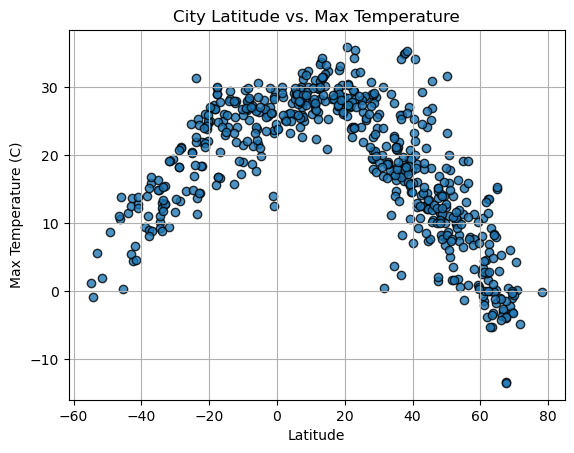

In [17]:
city_data_df

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Outputs/Fig1_Lat_v_MaxTemp.png")

#### Latitude Vs. Humidity

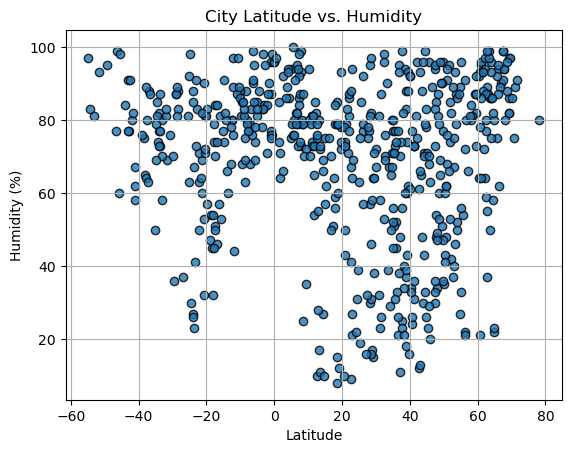

In [18]:
city_data_df

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Outputs/Fig2_Lat_v_Humidity.png")
                                              

#### Latitude Vs. Cloudiness

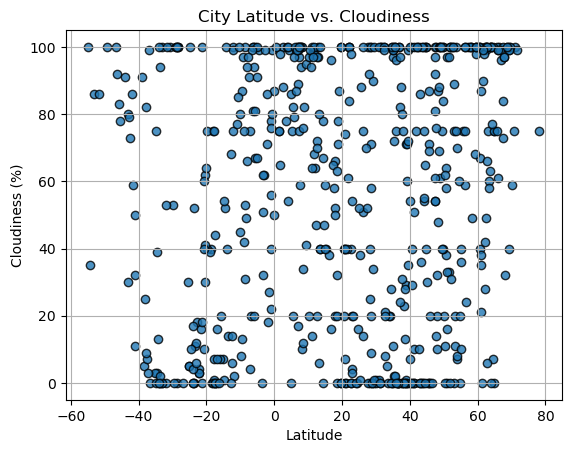

In [21]:
city_data_df

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Outputs/Fig3_Lat_v_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

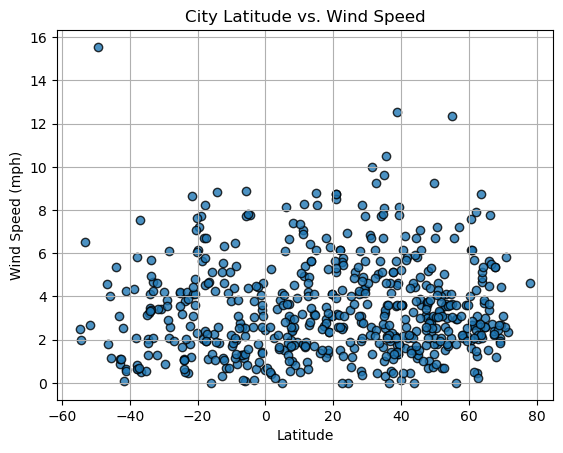

In [22]:
city_data_df

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Outputs/Fig4_Lat_v_WindSpeed.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on the data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Creating the plot
    plt.figure(figsize=(10, 6))  # Optional: specify figure size
    plt.scatter(x_values, y_values, color='blue', alpha=0.5)  # Plot the data points
    plt.plot(x_values, regress_values, "r-")  # Plot the regression line
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}', 
                 xy=text_coordinates, 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 color='red')

    # Save the plot as a PNG file
    plt.savefig(f'Outputs/{title.replace(" ", "_").replace("-", "_")}.png')  # Convert title to filename-safe string
    plt.show()  # Show the plot

In [24]:
# Filter the dataframe for the northern hemisphere (Lat >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,longyearbyen,78.2186,15.6401,-0.09,80,75,4.63,SJ,1715472801
4,stanley,54.8680,-1.6985,11.40,89,0,2.06,GB,1715472801
5,bilibino,68.0546,166.4372,0.50,80,32,1.19,RU,1715472802
7,timimoun,29.2639,0.2310,28.45,15,90,4.33,DZ,1715472804
8,duong dong,10.2167,103.9667,26.00,94,20,0.51,VN,1715472615


In [25]:
# Filter the dataframe for the southern hemisphere (Lat < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortaleza,-3.7227,-38.5247,28.07,78,0,2.57,BR,1715472798
1,neiafu,-18.6500,-173.9833,27.38,54,40,5.66,TO,1715472799
2,invercargill,-46.4000,168.3500,10.57,99,92,1.79,NZ,1715472800
6,murwillumbah,-28.3167,153.4000,21.20,88,100,2.06,AU,1715472653
13,adamstown,-25.0660,-130.1015,20.48,63,5,4.16,PN,1715472809


###  Temperature vs. Latitude Linear Regression Plot

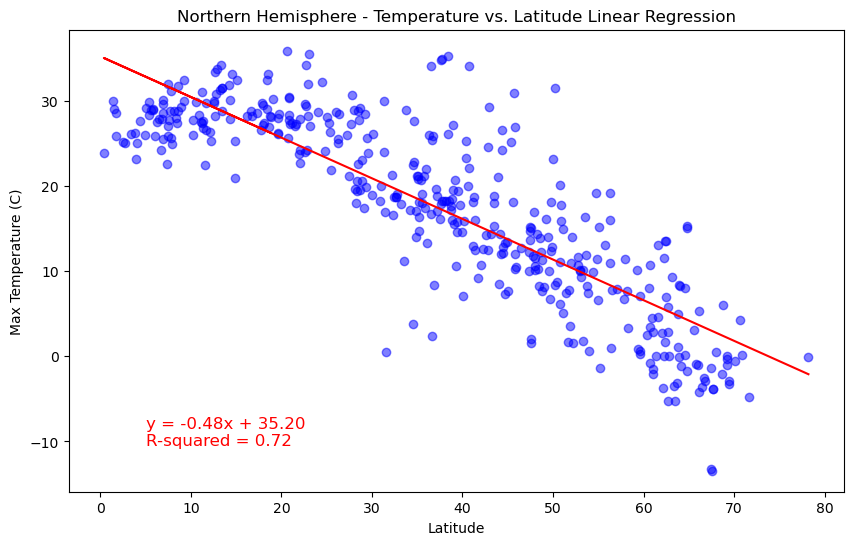

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Northern Hemisphere - Temperature vs. Latitude Linear Regression'
y_label = 'Max Temperature (C)'
text_coordinates = (0.1, 0.1)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

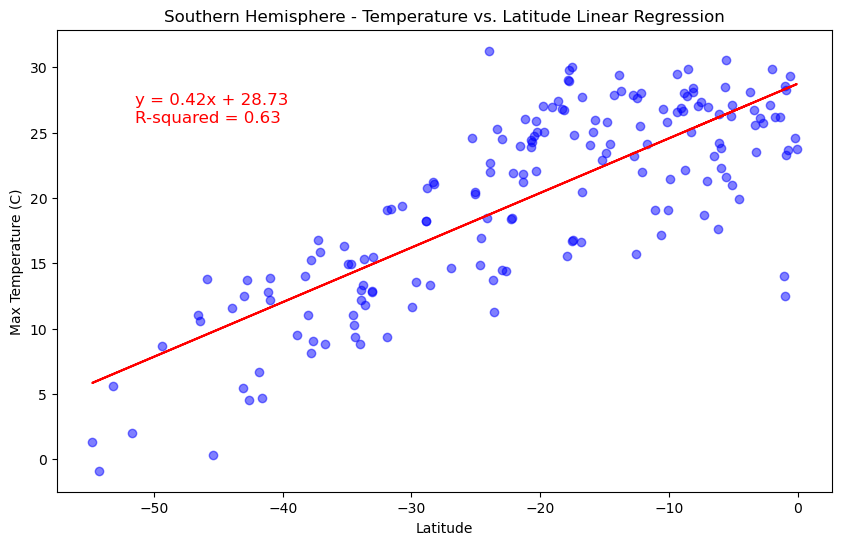

In [34]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Southern Hemisphere - Temperature vs. Latitude Linear Regression'
y_label = 'Max Temperature (C)'
text_coordinates = (0.1, 0.8)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

### Discussion about the linear relationship - max. temperature vs. latitude:

The two linear regressions show a strong relationship between latitude and temperature in both the northern and southern.

1. **Northern Hemisphere - Temperature vs. Latitude Linear Regression**
    - **Chart Analysis**: 
    As one moves further north (increasing latitude), the temperature decreases. This is shown by the negative slope of the line in the chart.
    - **Regression Equation**: 
    `y = -0.48x + 35.20`
    - **R-squared Value**: 
    0.72, meaning 72% of the temperature variation is explained by latitude.

2. **Southern Hemisphere - Temperature vs. Latitude Linear Regression**
    - **Chart Analysis**: 
    As one moves closer to the equator (increasing latitude towards zero), the temperature increases. This trend is indicated by the positive slope of the line.
    - **Regression Equation**: 
    `y = 0.42x + 28.73`
    - **R-squared Value**: 
    0.63, indicating that 63% of the temperature variation is explained by latitude.



### Humidity vs. Latitude Linear Regression Plot

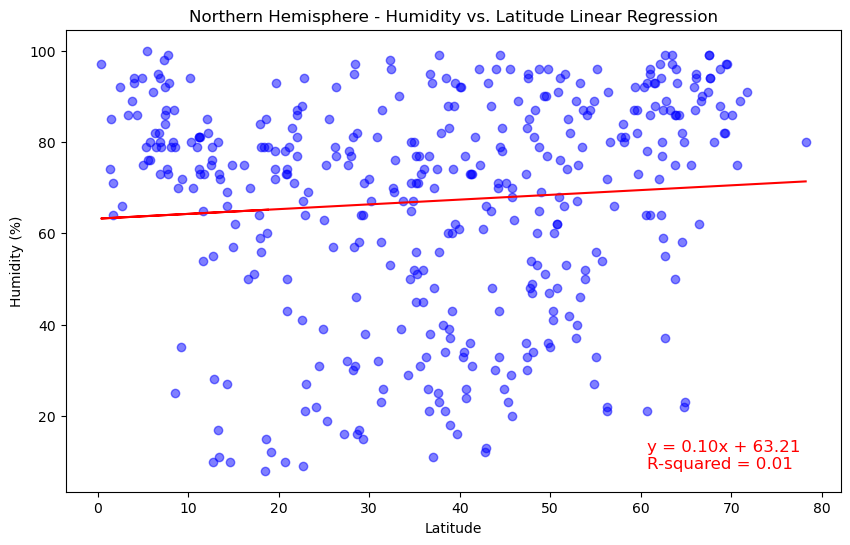

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Northern Hemisphere - Humidity vs. Latitude Linear Regression'
y_label = 'Humidity (%)'
text_coordinates = (0.75, 0.05)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

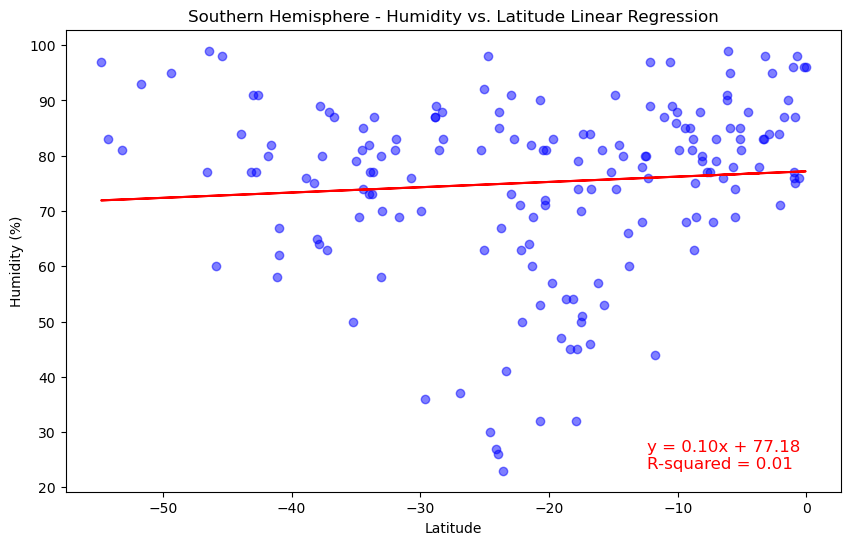

In [39]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Southern Hemisphere - Humidity vs. Latitude Linear Regression'
y_label = 'Humidity (%)'
text_coordinates = (0.75, 0.05)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

### Discussion about the linear relationship - humidity vs. latitude:

The linear regression analysis reveals a very weak relationship between latitude and humidity for both the Northern and Southern Hemispheres, as evidenced by the low R-squared values.

1. **Northern Hemisphere - Humidity vs. Latitude Linear Regression**

    - **Chart Analysis:**
    The chart displays no significant change in humidity with increasing latitude in the Northern Hemisphere. The data points are widely spread, suggesting high variability in humidity not well accounted for by latitude alone.
    - **Regression Equation:**
    `y = 0.10x + 63.21`
    - **R-squared Value:**
    0.01, indicating that only 1% of the humidity variation is explained by latitude, pointing to other factors influencing humidity levels.

2. **Southern Hemisphere - Humidity vs. Latitude Linear Regression**
    - **Chart Analysis:**
    Similar to the Northern Hemisphere, there is no significant change in humidity as latitude increases toward the equator in the Southern Hemisphere. The data points remain broadly dispersed.
    - **Regression Equation:**
    `y = 0.10x + 77.18`
    - **R-squared Value:**
    0.01, suggesting that latitude explains only 1% of the variation in humidity, underscoring the influence of other environmental or geographical factors.

**Possible Factors Contributing to Humidity Variations Beyond Latitude**

The low correlation between humidity and latitude suggests significant influences from other factors:

- **Proximity to Water Bodies:**
Coastal regions often experience higher humidity due to evaporation from nearby bodies of water.

- **Altitude:**
Regions at higher altitudes tend to have lower humidity because cooler air holds less moisture.

- **Prevailing Wind Patterns:**
Winds carrying moisture from oceans can increase humidity, whereas winds from dry regions can decrease it.

- **Vegetation:**
Dense vegetation, such as forests, can lead to higher humidity through the process of transpiration.

- **Seasonal Variations:**
Changes in seasons can significantly affect humidity, with some areas having distinct dry and wet periods.

- **Land Use and Urbanisation:**
Urban environments may alter local climates, impacting humidity levels through urban heat island effects.

- **Ocean Currents:**
Warm ocean currents typically raise local humidity levels, while cold currents can have the opposite effect.

### Cloudiness vs. Latitude Linear Regression Plot

In [40]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,longyearbyen,78.2186,15.6401,-0.09,80,75,4.63,SJ,1715472801
4,stanley,54.8680,-1.6985,11.40,89,0,2.06,GB,1715472801
5,bilibino,68.0546,166.4372,0.50,80,32,1.19,RU,1715472802
7,timimoun,29.2639,0.2310,28.45,15,90,4.33,DZ,1715472804
8,duong dong,10.2167,103.9667,26.00,94,20,0.51,VN,1715472615


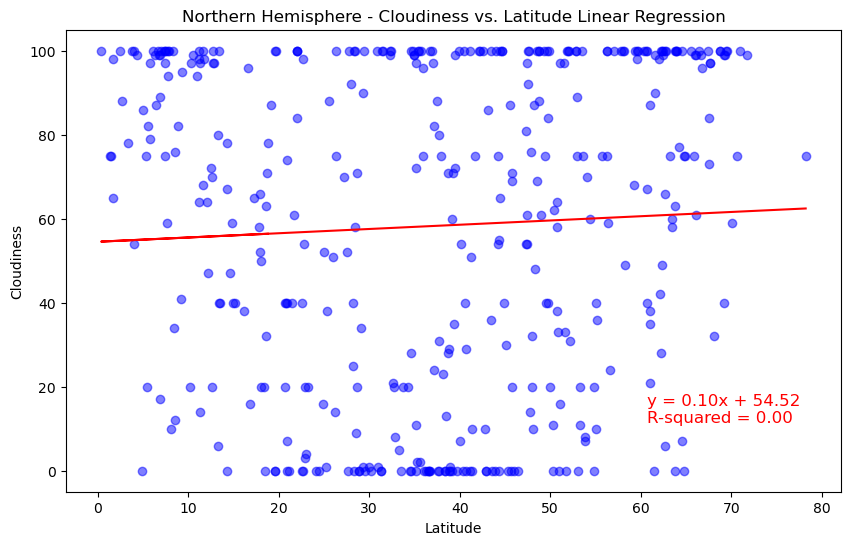

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression'
y_label = 'Cloudiness'
text_coordinates = (0.75, 0.15)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

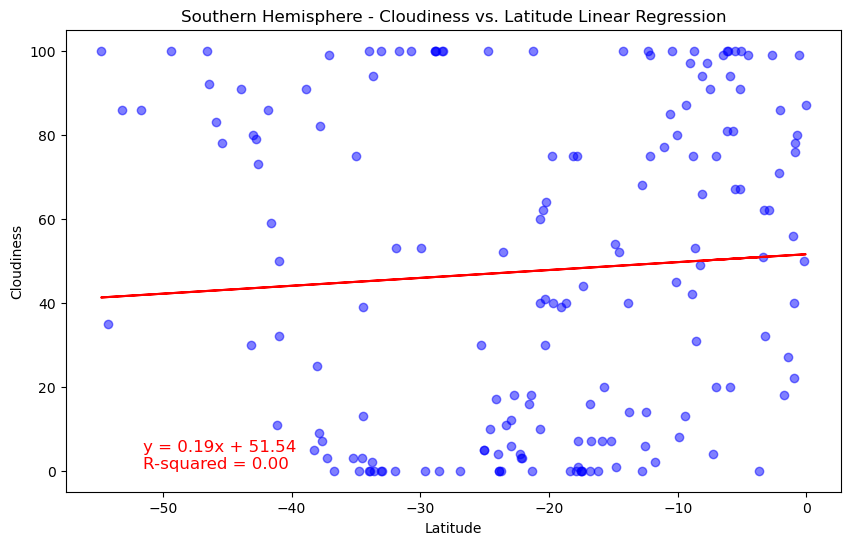

In [48]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression'
y_label = 'Cloudiness'
text_coordinates = (0.1, 0.05)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

### Discussion about the linear relationship - cloudiness vs. latitude:

The linear regression analyses for cloudiness vs. latitude in both the Northern and Southern Hemispheres show very weak relationships, as indicated by the near-zero R-squared values in both plots.

1. **Northern Hemisphere - Cloudiness vs. Latitude Linear Regression**

- **Regression Analysis**: 
  The regression line `y = 0.10x + 54.52` slightly suggests that cloudiness increases as latitude increases, but the effect is negligible.
- **R-squared Value**: 
  0.00, indicating that latitude does not significantly predict cloudiness in the Northern Hemisphere.

2. **Southern Hemisphere - Cloudiness vs. Latitude Linear Regression**

- **Regression Analysis**: 
  The regression line `y = 0.19x + 51.54` also shows a minimal increase in cloudiness with increasing latitude towards the equator, but this relationship is not significant.
- **R-squared Value**: 
  0.00, further emphasizing that latitude is not a strong predictor of cloudiness in the Southern Hemisphere.

**Conclusion**: 
As with humidity, latitude appears to have no substantial effect on cloudiness in either hemisphere, suggesting that other factors such as atmospheric circulation patterns, local geographical features, and seasonal variations might play more significant roles in determining cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

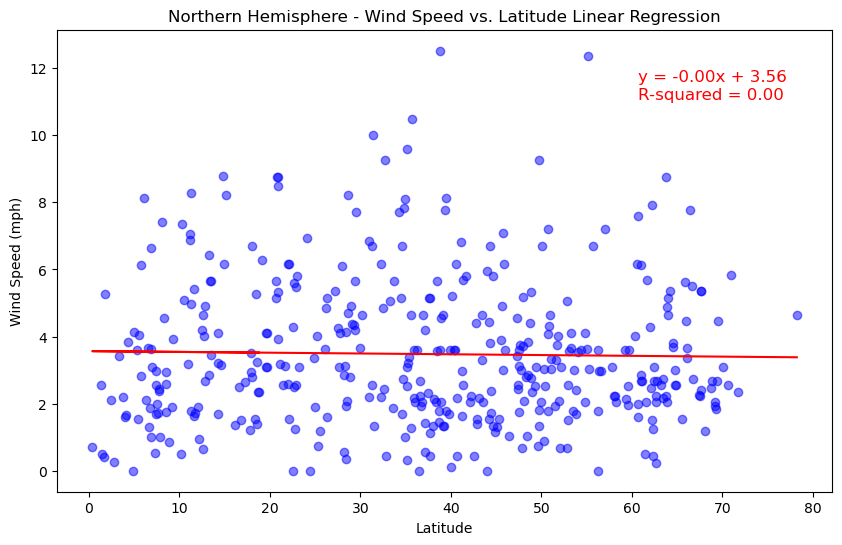

In [53]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression'
y_label = 'Wind Speed (mph)'
text_coordinates = (0.75, 0.85)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

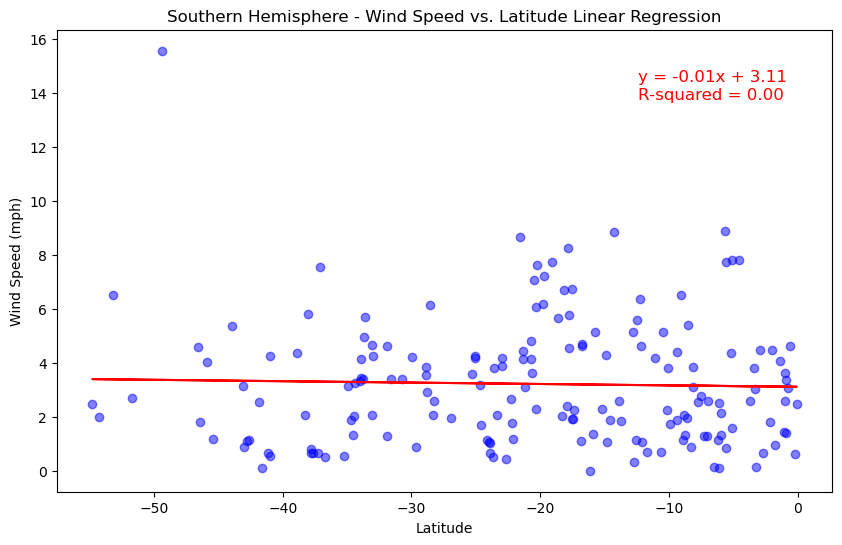

In [54]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression'
y_label = 'Wind Speed (mph)'
text_coordinates = (0.75, 0.85)  # Adjust these coordinates for linear regression text position

plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

### Discussion about the linear relationship - wind speed vs. latitude:

The linear regression analyses for wind speed vs. latitude in both the Northern and Southern Hemispheres reveal very weak relationships, with near-zero R-squared values suggesting that latitude does not significantly impact wind speed.

### Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

- **Regression Analysis**: 
  The regression line `y = -0.00x + 3.56` indicates no significant change in wind speed with varying latitudes. The slope is nearly zero, showing almost no relationship.
- **R-squared Value**: 
  0.00, confirming that latitude explains none of the variability in wind speed for the Northern Hemisphere.

### Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

- **Regression Analysis**: 
  Similarly, the regression line `y = -0.01x + 3.11` shows a negligible decrease in wind speed with increasing latitude towards the equator, but this change is not statistically significant.
- **R-squared Value**: 
  0.00, indicating that latitude is not a determinant factor for wind speed variations in the Southern Hemisphere.

**Conclusion**: 
These findings suggest that, as with humidity and cloudiness, other factors, possibly including geographical terrain, oceanic influences, and atmospheric conditions, are more crucial in determining wind speed than merely latitude. This aligns with the understanding that wind speed is influenced by a complex interplay of multiple environmental variables.

### Overall Summary of Linear Regression Analyses

The only weather condition that latitude appears to have a significant impact on is maximum temperature. Temperature appears to increase as latitude approaches the equator, with the highest temperatures observed at the equator and the lowest at the poles.